In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%matplotlib inline

In [3]:
df = pd.read_csv('./ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


### 12.1 단순회귀모형

In [4]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1 # 독립변수의 수

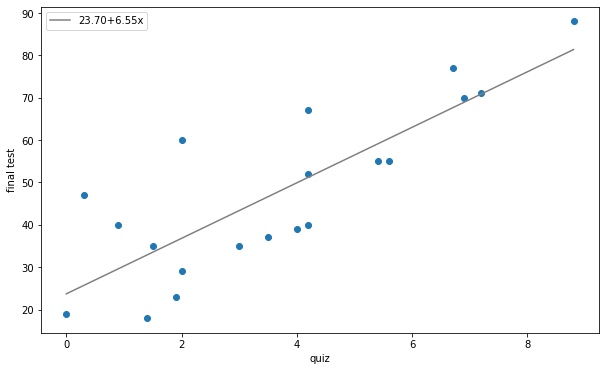

In [8]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()
plt.show()

#### 회귀분석에서의 가설
- $y=\beta_0+\beta_1x$

- $Y_i=\beta_0+\beta_1x_i+\epsilon_i\quad(i=1,2,\dots,n)$

 - $\epsilon_i\stackrel{iid}{\sim}N(0,\sigma^2)$

- 회귀직선
 - $y=\hat{\beta_0}+\hat{\beta_1}x$

#### statsmodels에 의한 회귀분석

In [11]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           8.59e-06
Time:                        06:13:24   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0

#### 회귀계수
- Intercept: 절편 $\beta_0$
- quiz: 기울기 $\beta_1$
- coef: 회귀계수의 추정값
- std err: 추정값의 표준오차
- P>|t|: 검정통계량의 p값
- [0.025 0.975]: 회귀계수의 95% 신뢰구간

In [12]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

(23.69949534673122, 6.553732606043082)

In [17]:
y_hat = beta0_hat + beta1_hat*x
eps_hat = y - y_hat

$\hat{\sigma}^2=\frac{1}{n-p-1}\sum_i^n(\hat{\epsilon}_i-\overline{\hat{\epsilon}})^2=\frac{1}{n-p-1}\sum_i^n\hat{\epsilon}_i^2$
- 잔차의 자유도: 회귀계수의 수 p+1만큼 감소하여 n-p-1
- 모분산의 불편추정량 $\hat{\sigma}^2$은 n-p-1로 나누어 계산

In [18]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.29043473495898

$\hat{\beta}_0$과 $\hat{\beta}_1$의 표준오차: $\sqrt{C_0\hat{\sigma}^2},\sqrt{C_1\hat{\sigma}^2}$
- $(XX^T)^{-1}$의 대각성분의 첫 번째가 $C_0$, 두 번째가 $C_1$

In [19]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))
C0, C1

(0.16546420022873098, 0.008503003686052106)

In [23]:
np.sqrt(s_var*C0), np.sqrt(s_var*C1)

(4.713837012645705, 1.0685841387335373)

#### 회귀계수의 신뢰구간
회귀계수 $\beta_0,\beta_1$의 신뢰수준 $100(1-\alpha)\%$의 신뢰구간은

$\left[\hat{\beta}_i-t_{\alpha/2}(n-2)\sqrt{C_i\hat{\sigma}^2},\;\hat{\beta}_i-t_{\alpha/2}(n-2)\sqrt{C_i\hat{\sigma}^2}\right]\quad(i=0,1)$

으로 추정된다.

In [24]:
# b0 95% 신뢰구간

rv = stats.t(n-2)
lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var*C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var*C0)
lcl, hcl

(13.796091272760252, 33.60289942070219)

In [25]:
# b1 95% 신뢰구간

rv = stats.t(n-2)
lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var*C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var*C1)
lcl, hcl

(4.308720637125889, 8.798744574960274)

- $H_0:\beta_1=0$
- $H_1:\beta_1\neq0$

$t=\frac{\hat{\beta}_1-\beta_1}{\sqrt{\hat{\sigma}^2C_1}}\\
t=\frac{\hat{\beta}_1}{\sqrt{\hat{\sigma}^2C_1}}$

In [26]:
t = beta1_hat / np.sqrt(s_var*C1)
t

6.133099274532021

In [29]:
(1 - rv.cdf(t))*2

8.745298393186829e-05

- $H_0:\beta_0=0$
- $H_1:\beta_0\neq0$

In [28]:
t = beta0_hat / np.sqrt(s_var*C0)
t

5.0276442064401285

In [31]:
(1 - rv.cdf(t)) * 2

8.745298393186829e-05

### 12.2 중회귀모형

- 중회귀모형: p개의 설명변수 $x_1,x_2,\dots,x_p$와 반응변수 $y$ 사이에 다음과 같은 관계를 가정한 모델
 - $y=\beta_0+\beta_1x_1+\dots+\beta_px_p$

In [34]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           6.19e-06
Time:                        07:03:22   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.8

In [35]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

In [38]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

(-1.8709143470995908, 6.42887834300237, 4.191706546398685)

In [39]:
# 잔차
y_hat = beta0_hat + beta1_hat*x1 + beta2_hat*x2
eps_hat = y - y_hat

In [40]:
s_var = np.sum(eps_hat**2)/(n-p-1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [41]:
# b2의 95% 신뢰구간
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025)*np.sqrt(s_var*C2)
hcl = beta2_hat - rv.isf(0.975)*np.sqrt(s_var*C2)
lcl, hcl

(0.440253332543481, 7.943159760253889)

#### 가변수
- 질적변수를 양적변수로 변환
-ex) $Y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i도보}\;+\beta_4x_{i자전거}\;\;+\epsilon_i$

In [43]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           7.47e-05
Time:                        07:18:08   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.33

### 12.3 모형의 선택

In [44]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           8.59e-06
Time:                        07:22:37   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0

In [45]:
y_hat = np.array(result.fittedvalues)
y_hat

array([51.22517229, 70.88637011, 23.69949535, 43.36069316, 33.53009426,
       29.59785469, 36.1515873 , 46.63755947, 49.91442577, 59.08965142,
       51.22517229, 68.92025033, 36.80696056, 81.37234228, 25.66561513,
       67.60950381, 51.22517229, 60.40039794, 32.874721  , 36.80696056])

In [46]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.77482771,   0.11362989,  -4.69949535,  -8.36069316,
         1.46990574,  10.40214531, -13.1515873 ,  -9.63755947,
       -10.91442577,  -4.08965142, -11.22517229,   1.07974967,
        -7.80696056,   6.62765772,  21.33438487,   9.39049619,
         0.77482771,  -5.40039794, -14.874721  ,  23.19303944])

In [47]:
np.sum(eps_hat**2)

2417.227825229262

#### 결정계수
- 총변동(total variation): 관측값 $y_i$가 어느 정도 분산되어 있는지 나타내는 지표
 - $\sum_{i=1}^n(y_i-\overline{y})^2$
- 회귀변동(regression variation): 예측값 $\hat{y}_i$가 관측값의 평균값 $\overline{y}$에 대해서 어느 정도 분산되어 있는지 나타내는 지표
 - $\sum_{i=1}^n(\hat{y}_i-\overline{y})^2$
 - $\hat{y}_i$가 $y_i$에 가까울 수록 총변동에 가까워진다.
- 잔차변동(residual variation): 잔차의 산포도를 나타내는 지표
 - $\sum_{i=1}^n\hat{\epsilon}_i^2$
 - 잔차제곱합과 동일하며 $\hat{y}_i$가 $y_i$에 가까울 수록 0에 가까워진다.
- **총변동 = 회귀변동 + 잔차변동**

$R^2=\frac{회귀변동}{총변동}=1-\frac{잔차변동}{총변동}$

In [49]:
total_var = np.sum((y-np.mean(y))**2)
exp_var = np.sum((y_hat-np.mean(y))**2)
unexp_var = np.sum(eps_hat**2)

In [50]:
total_var, exp_var+unexp_var

(7468.55, 7468.549999999996)

In [51]:
# 결정계수
exp_var / total_var

0.6763457665504996

In [53]:
np.corrcoef(x, y)[0, 1]**2

0.6763457665504998

#### 조정결정계수
- 설명변수를 추가했을 때 그 설명변수에 어느 정도 이상의 설명력이 없는 경우 결정계수의 값이 증가하지 않도록 하는 결정계수
- 자유도조정 결정계수라고도 함

$\overline{R}^2=1-\frac{잔차변동/n-p-1}{총변동/n-1}$
- 잔차변동의 자유도: $n-p-1$
- 회귀변동의 자유도: $p$
- 총변동의 자유도 = 잔차변동의 자유도 + 회귀변동의 자유도 = $n-1$

In [54]:
1 - (unexp_var/(n-p-1)) / (total_var/(n-1))

0.6583649758033057

#### F 검정
- $H_0:\beta_1=\beta_2=\dots=\beta_p=0$
- $H_1$: 적어도 하나의 $\beta_1$은 $0$이 아니다
- t 검정과 다르게 회귀계수가 아닌 모형 전체에 대해서 검정

$F=\frac{회귀변동/p}{잔차변동/(n-p-1)}$

In [55]:
f = (exp_var/p) / (unexp_var/(n-p-1))
f

37.61490671126522

In [60]:
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

8.590875866687497e-06

#### 우도(likelihood)
- 어떤 관측값을 얻을 확률

0.3의 확률로 앞면, 0.7의 확률로 뒷면이 나오는 동전을 가정\
앞면을 1, 뒷면을 0이라고 했을 때 5번 던진 결과: $[0,1,0,0,1]$\
이 결과를 얻을 확률: $0.3*0.7*0.3*0.3*0.7\simeq0.031$

$L=\prod_{i=1}^5f(x_i)=0.3^2 0.7^3\simeq0.031$

In [62]:
prob = 0.3
coin_result = [0,1,0,0,1]
rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.030869999999999995

$L=\prod_{i=1}^5f(x_i)=p^2(1-p)^3$

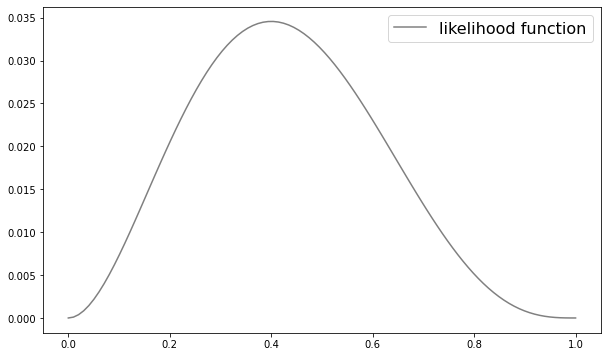

In [69]:
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result)) for prob in ps]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

- 최우추정법(method of maximum likelihood): 어떤 모수가 주어졌을 때, 원하는 값들이 나올 가능도를 최대로 만드는 모수를 선택하는 방법
- 최우추정량(maximum likelihood estimator): 최우추정법에 의해 추측되는 추정량
- 최우추정값(maximum likelihood estimate)

$L=\prod_{i=1}f(x_i)$

$logL=\sum_{i=1}logf(x_i)$

In [70]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0,1,0,0,1])))
mll

-3.365058335046282

#### 최대로그우도
$Y_i\sim N(\beta_0+\beta_1x_1,\sigma^2)$

단순회귀모형에서 $\beta_0,\beta_1,\sigma^2$의 최우추정량은 $\beta_0,\beta_1,\frac{1}{n}\sum_{i=1}^n\hat{\epsilon}_i$으로 알려져있다.

최대로그우도는 $N(\hat{y},\frac{1}{n}\sum_{i=1}^n\hat{\epsilon}_i)$의 밀도함수를 $f(x)$로 하여

$\sum_{i=1}^nlogf(y_i)$라고 구할 수 있다.

In [71]:
rv = stats.norm(y_hat, np.sqrt(unexp_var/n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.32521428624038

#### AIC
$AIC=-2\times최대로그우도+2\times회귀계수의\;수$

In [72]:
aic = -2*mll + 2*(p+1)
aic

156.65042857248076

#### 베이지안 정보 기준
$BIC=-2\times최대로그우도+log\;n\times회귀계수의\;수$

In [73]:
bic = -2*mll + np.log(n)*(p+1)
bic

158.64189311958876

### 12.4 모형의 타당성

In [75]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           6.19e-06
Time:                        10:52:29   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.8

In [76]:
eps_hat = np.array(result.resid)

#### 정규성 검정
- $\epsilon_i\stackrel{iid}{\sim}N(0,\sigma^2)$
- $\hat{\epsilon}_i$가 정규분포를 따르는지 확인하는 정규성 검정을 수행
- Prob(Omnibus)나 Prob(JB)가 유의수준 0.05 이상이면 정규분포를 따른다고 볼 수 있음
- Skew(왜도)와 Kurtosis(첨도)로도 정규성 확인

- $H_0$: 잔차항은 정규분포를 따른다.
- $H_1$: 잔차항은 정규분포를 따르지 않는다.

- 왜도(skewness)
 - $\sum_i^n\left(\frac{x-\overline{x}}{S}\right)^3$

In [77]:
stats.skew(eps_hat)

0.6599489486177472

- 첨도(kurtosis)
 - $\sum_i^n\left(\frac{x-\overline{x}}{S}\right)^4$

In [78]:
stats.kurtosis(eps_hat, fisher=False)

2.4365833256763025

#### 더빈-왓슨비
- 다른 오차팡이 서로 무상관인지 여부를 체크하는 지표
- 다루고 있는 데이터가 시계열 데이터인 경우 중요
- 0부터 4의 값이며 0에 가까우면 양의 상관, 4에 가까우면 음의 상관, 2 앞뒤의 값이면 무상관

$\frac{\sum_{i=2}^n(\hat{\epsilon}_i-\hat{\epsilon}_{i-1})^2}{\sum_{i=1}^n\hat{\epsilon}_i^2}$

In [80]:
np.sum(np.diff(eps_hat, 1)**2) / np.sum(eps_hat**2)

1.5082185264423018

#### 다중공선성
- Cond. No.: 조건수를 의미하며 다중공선성을 확인하는 지표
 - 조건수의 값이 클수록 모형이 있는 항의 다중공선성이 높다.
 - 다중공선성이 크면 회귀계수의 분산이 커져 모형의 예측 결과가 나빠진다고 알려져 있다

In [81]:
df['mid_test'] = df['quiz'] * 2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [83]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           8.59e-06
Time:                        12:16:49   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0